# Assignmnet 1

In [1]:
# If  these dependencies are not installed on the system, uncomment the lines below and run the code.
#%pip install numpy
#%pip install pandas
#%pip install matplotlib
#%pip install calplot
#%pip install plotly
#%pip install seaborn

In [2]:
# imports needed to run the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calplot
import plotly.express as px
import requests
import json

# font family for the plots
plt.rcParams['font.family'] = 'Helvetica' 

## A1 Part 1: Visualizing patterns in the data
In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.    


For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

### First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).

In [3]:
# Reading the dataset from the downloaded file. 
# Assuming the reader have the same file with the same name placed in the same folder as this notebook file.
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

In [4]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes = pd.Series(sorted(focuscrimes))

#### Week-day plots

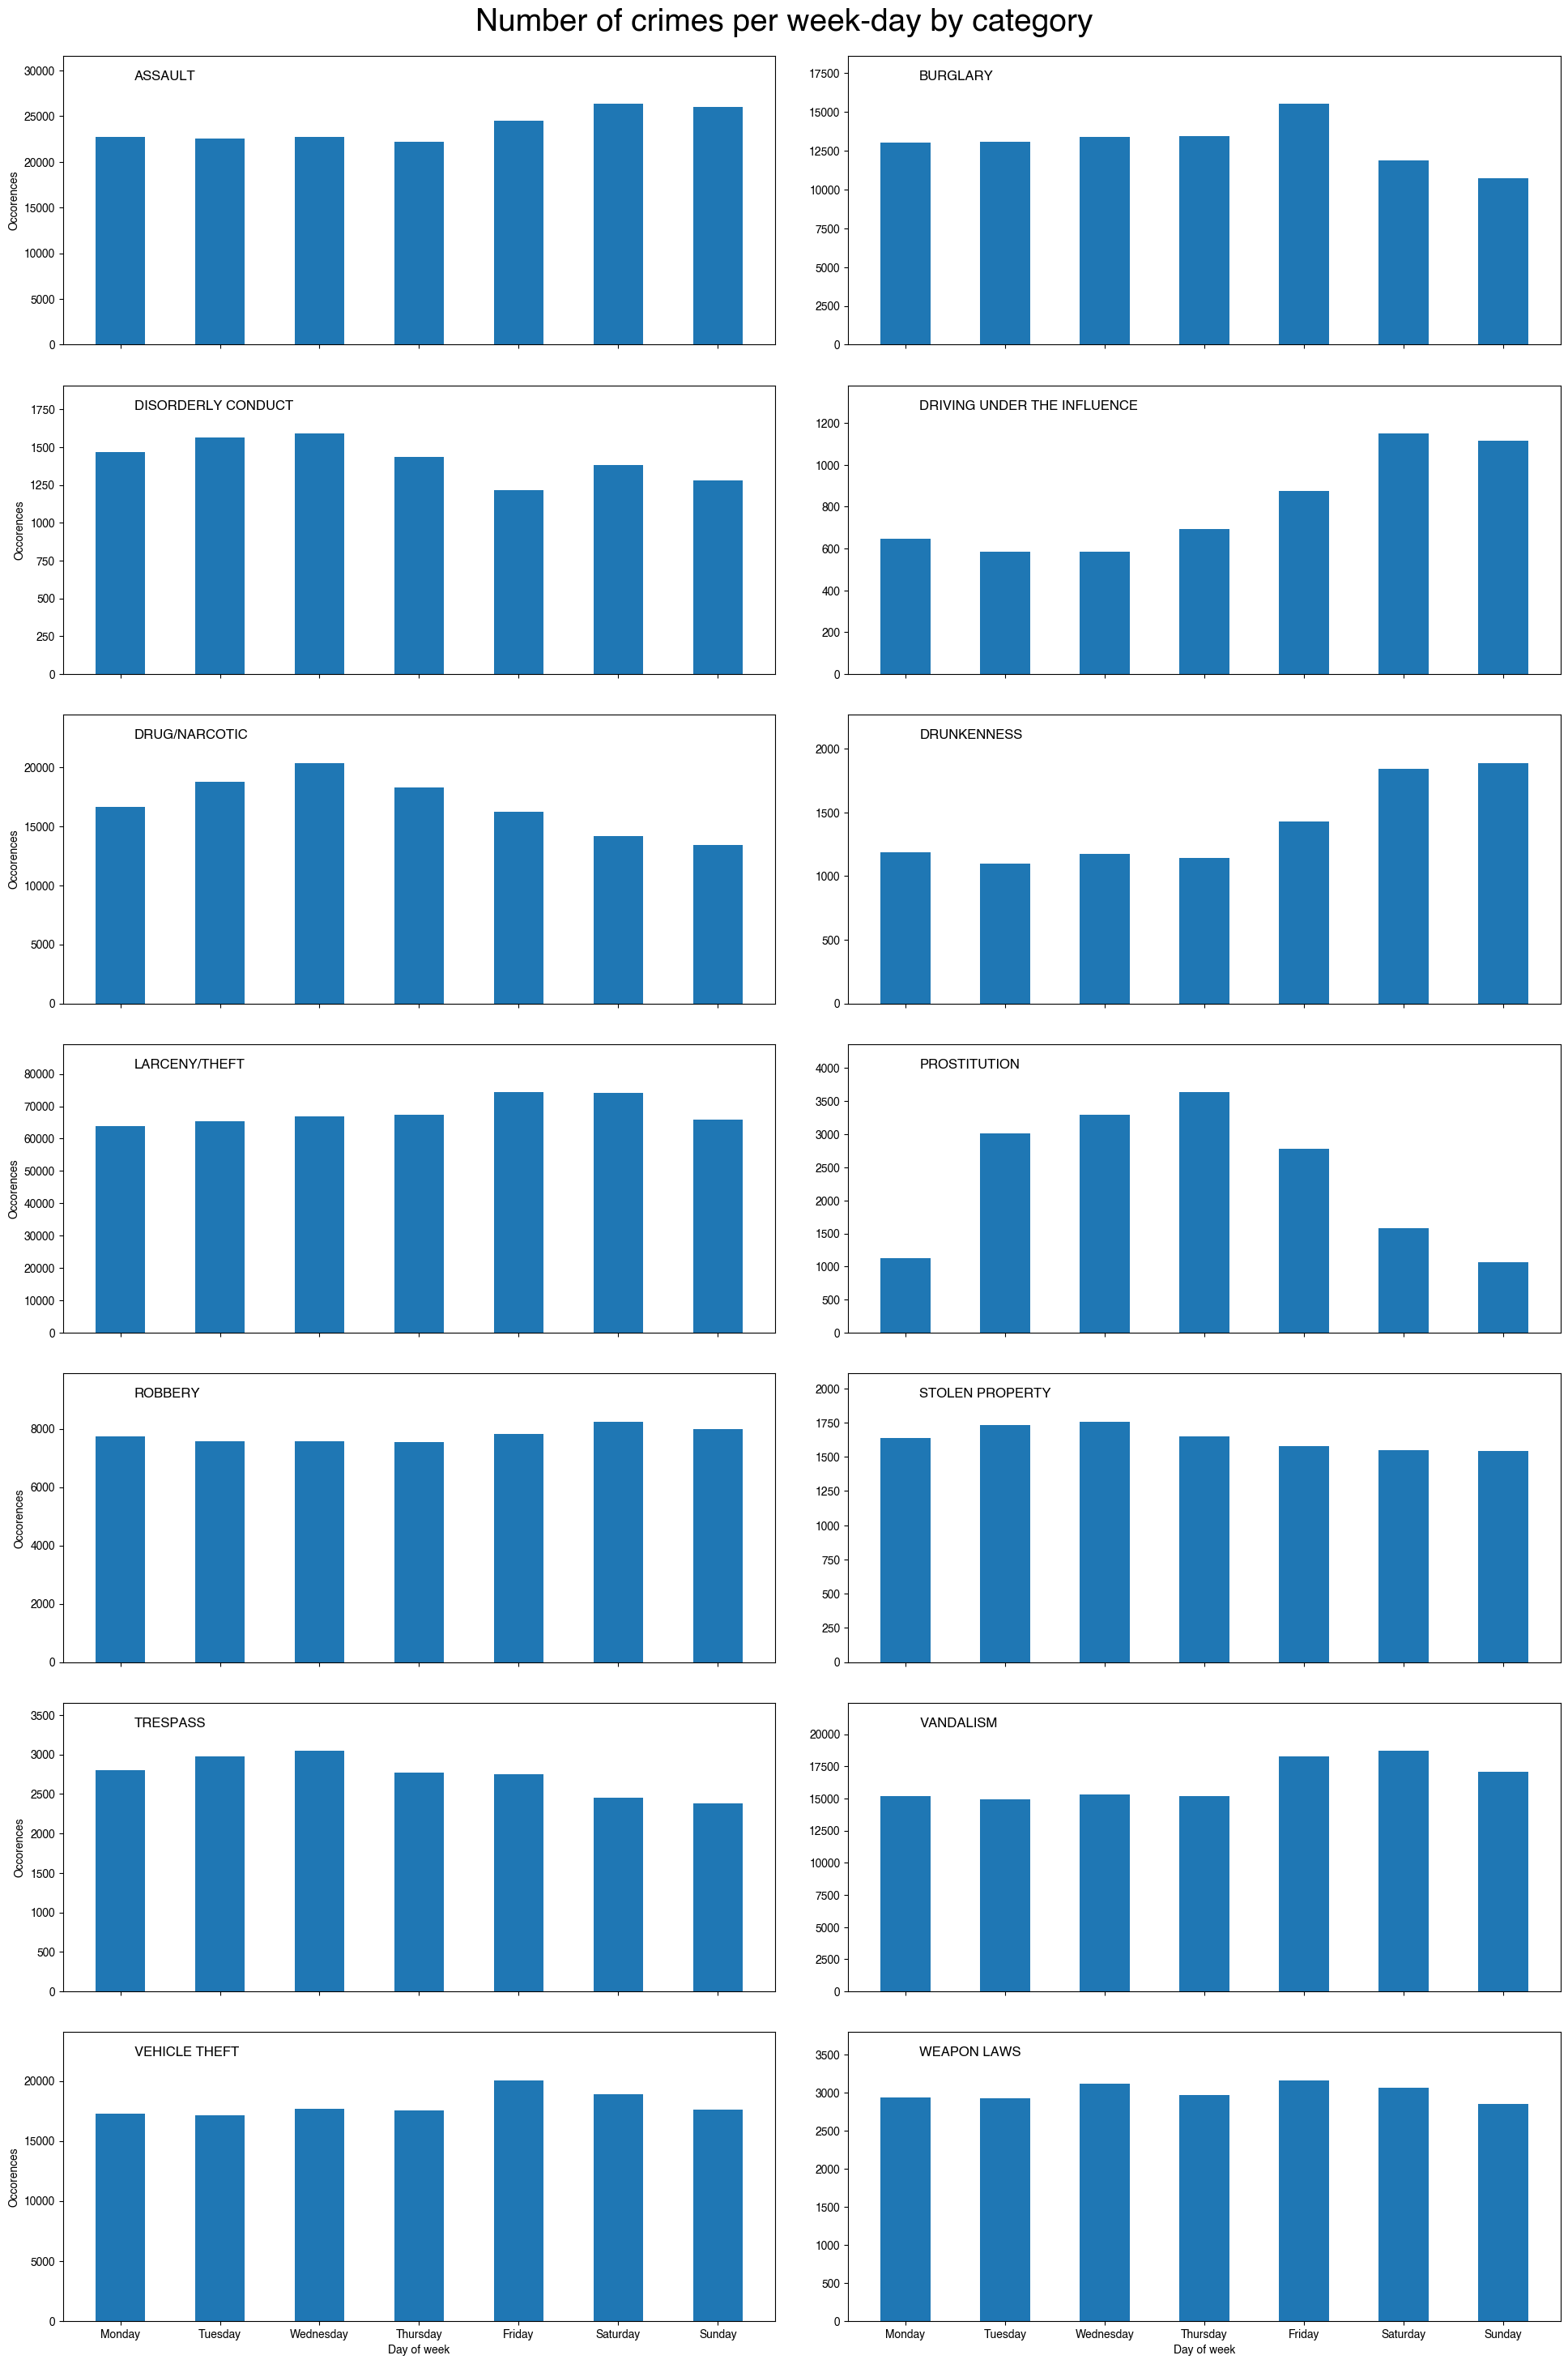

In [5]:
weekday_order = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per week-day by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    crime_counts_per_day = crime_data['DayOfWeek'].value_counts()#.sort_index() # count the crimes per week-day for this category
    
    crime_counts_per_day = crime_counts_per_day.reindex(sorted(crime_counts_per_day.index, key=lambda day: weekday_order[day])) # sort the in a normal week order

    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_day.index, crime_counts_per_day.values, width=0.5) # add data to the chart (x,y)
    
    # add / remove years and years-title on all or the last 2
    ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Day of week')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.


> This bar chart displays the count of weekly crimes by category, compiled from data spanning from January 2003 to early May 2018.   
> It is important to note that in these 14 charts, the occurrence counts (Y-axis) are not identical.     
> An observation from the data is that prostitution appears to be more prevalent midweek than at the beginning or end of the week, at least there are a higher number of reported crimes during these days. 

#### The months

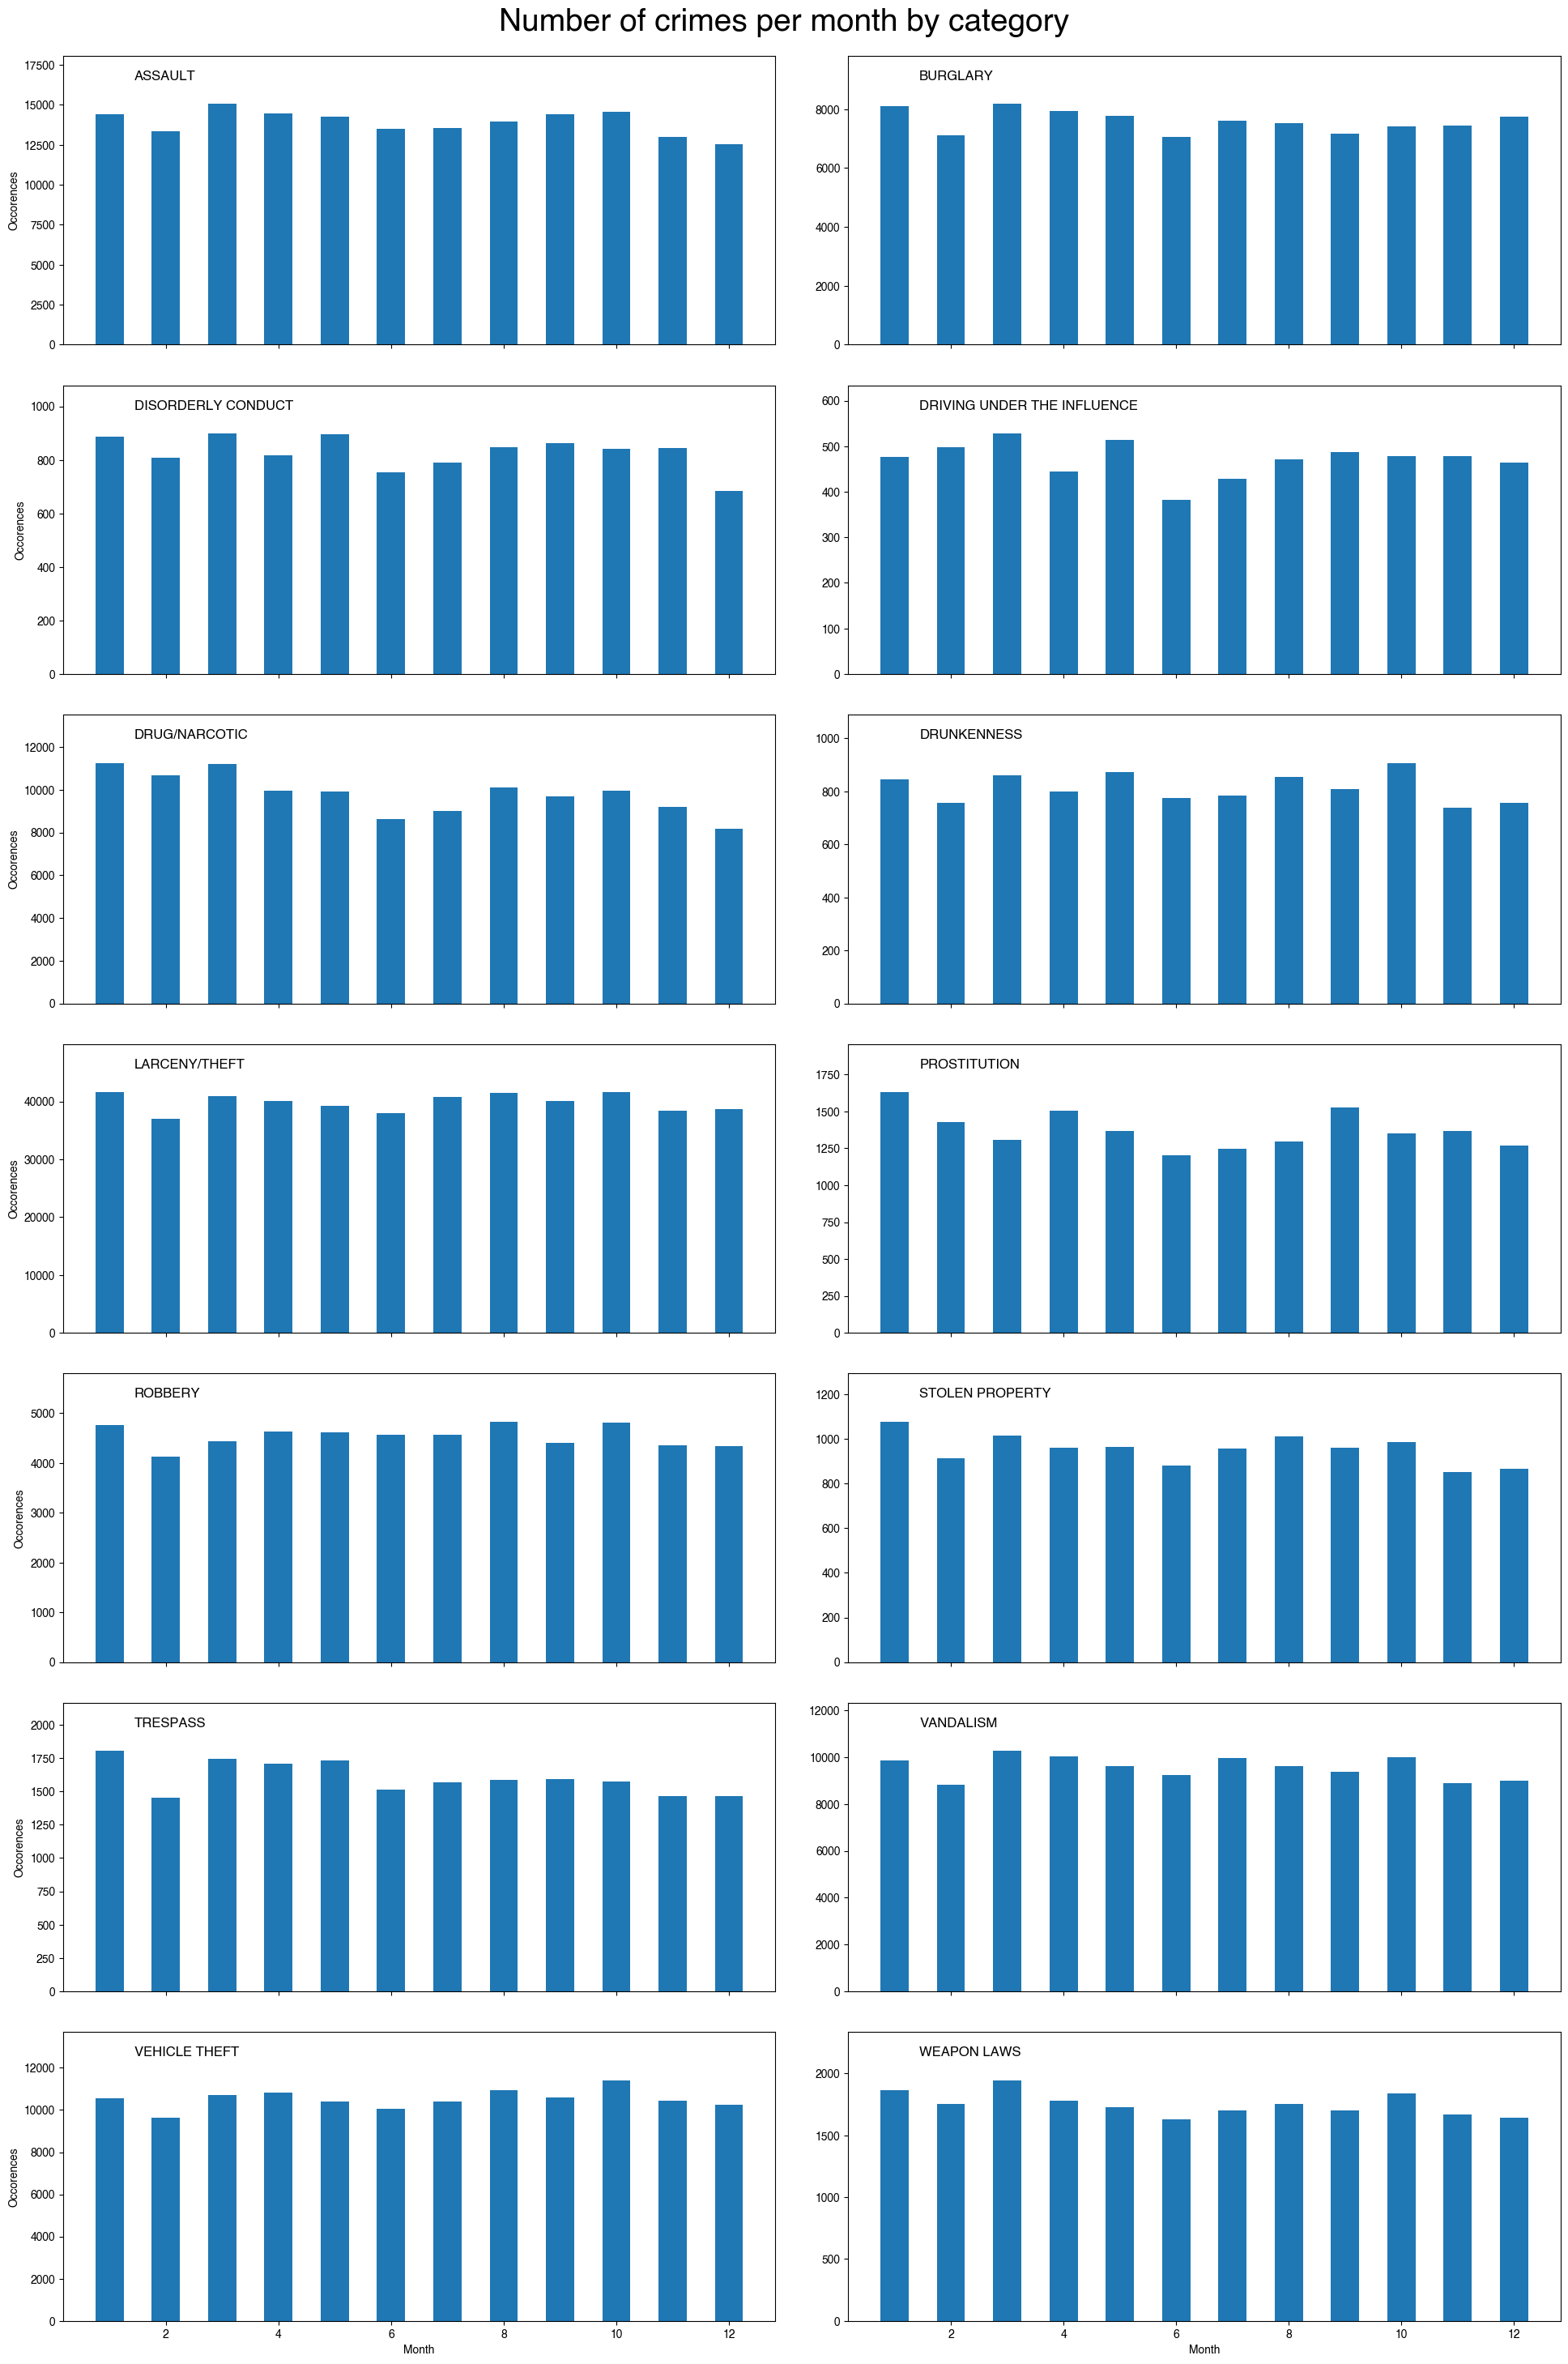

In [6]:
data['date'] = pd.to_datetime(data['Date'])
data['month'] = data['date'].dt.month

fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per month by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    crime_counts_per_month = crime_data['month'].value_counts().sort_index() # count the crimes per year for this category
    
    #crime_counts_per_day = crime_counts_per_day.reindex(sorted(crime_counts_per_day.index, key=lambda day: weekday_order[day])) # sort the in a normal week order

    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_month.index, crime_counts_per_month.values, width=0.5) # add data to the chart (x,y)
    
    # add / remove years and years-title on all or the last 2
    ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Month')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.

> This bar chart displays the count of monthly crimes by category, compiled from data spanning from January 2003 to early May 2018.   
> It is important to note that in these 14 charts, the occurrence counts (Y-axis) are not identical.    
> One observation from these charts is that within each category, there is very little difference in the number of incidents throughout the year; the crime incidents are relatively stable within each category. Another point to highlight is that some crimes have far more occurrences than others. For example, trespassing is relatively low compared to assault. However, this is not immediately obvious in these charts due to the inconsistency of the counts on the Y-axis. 

#### The 24-hour cycle

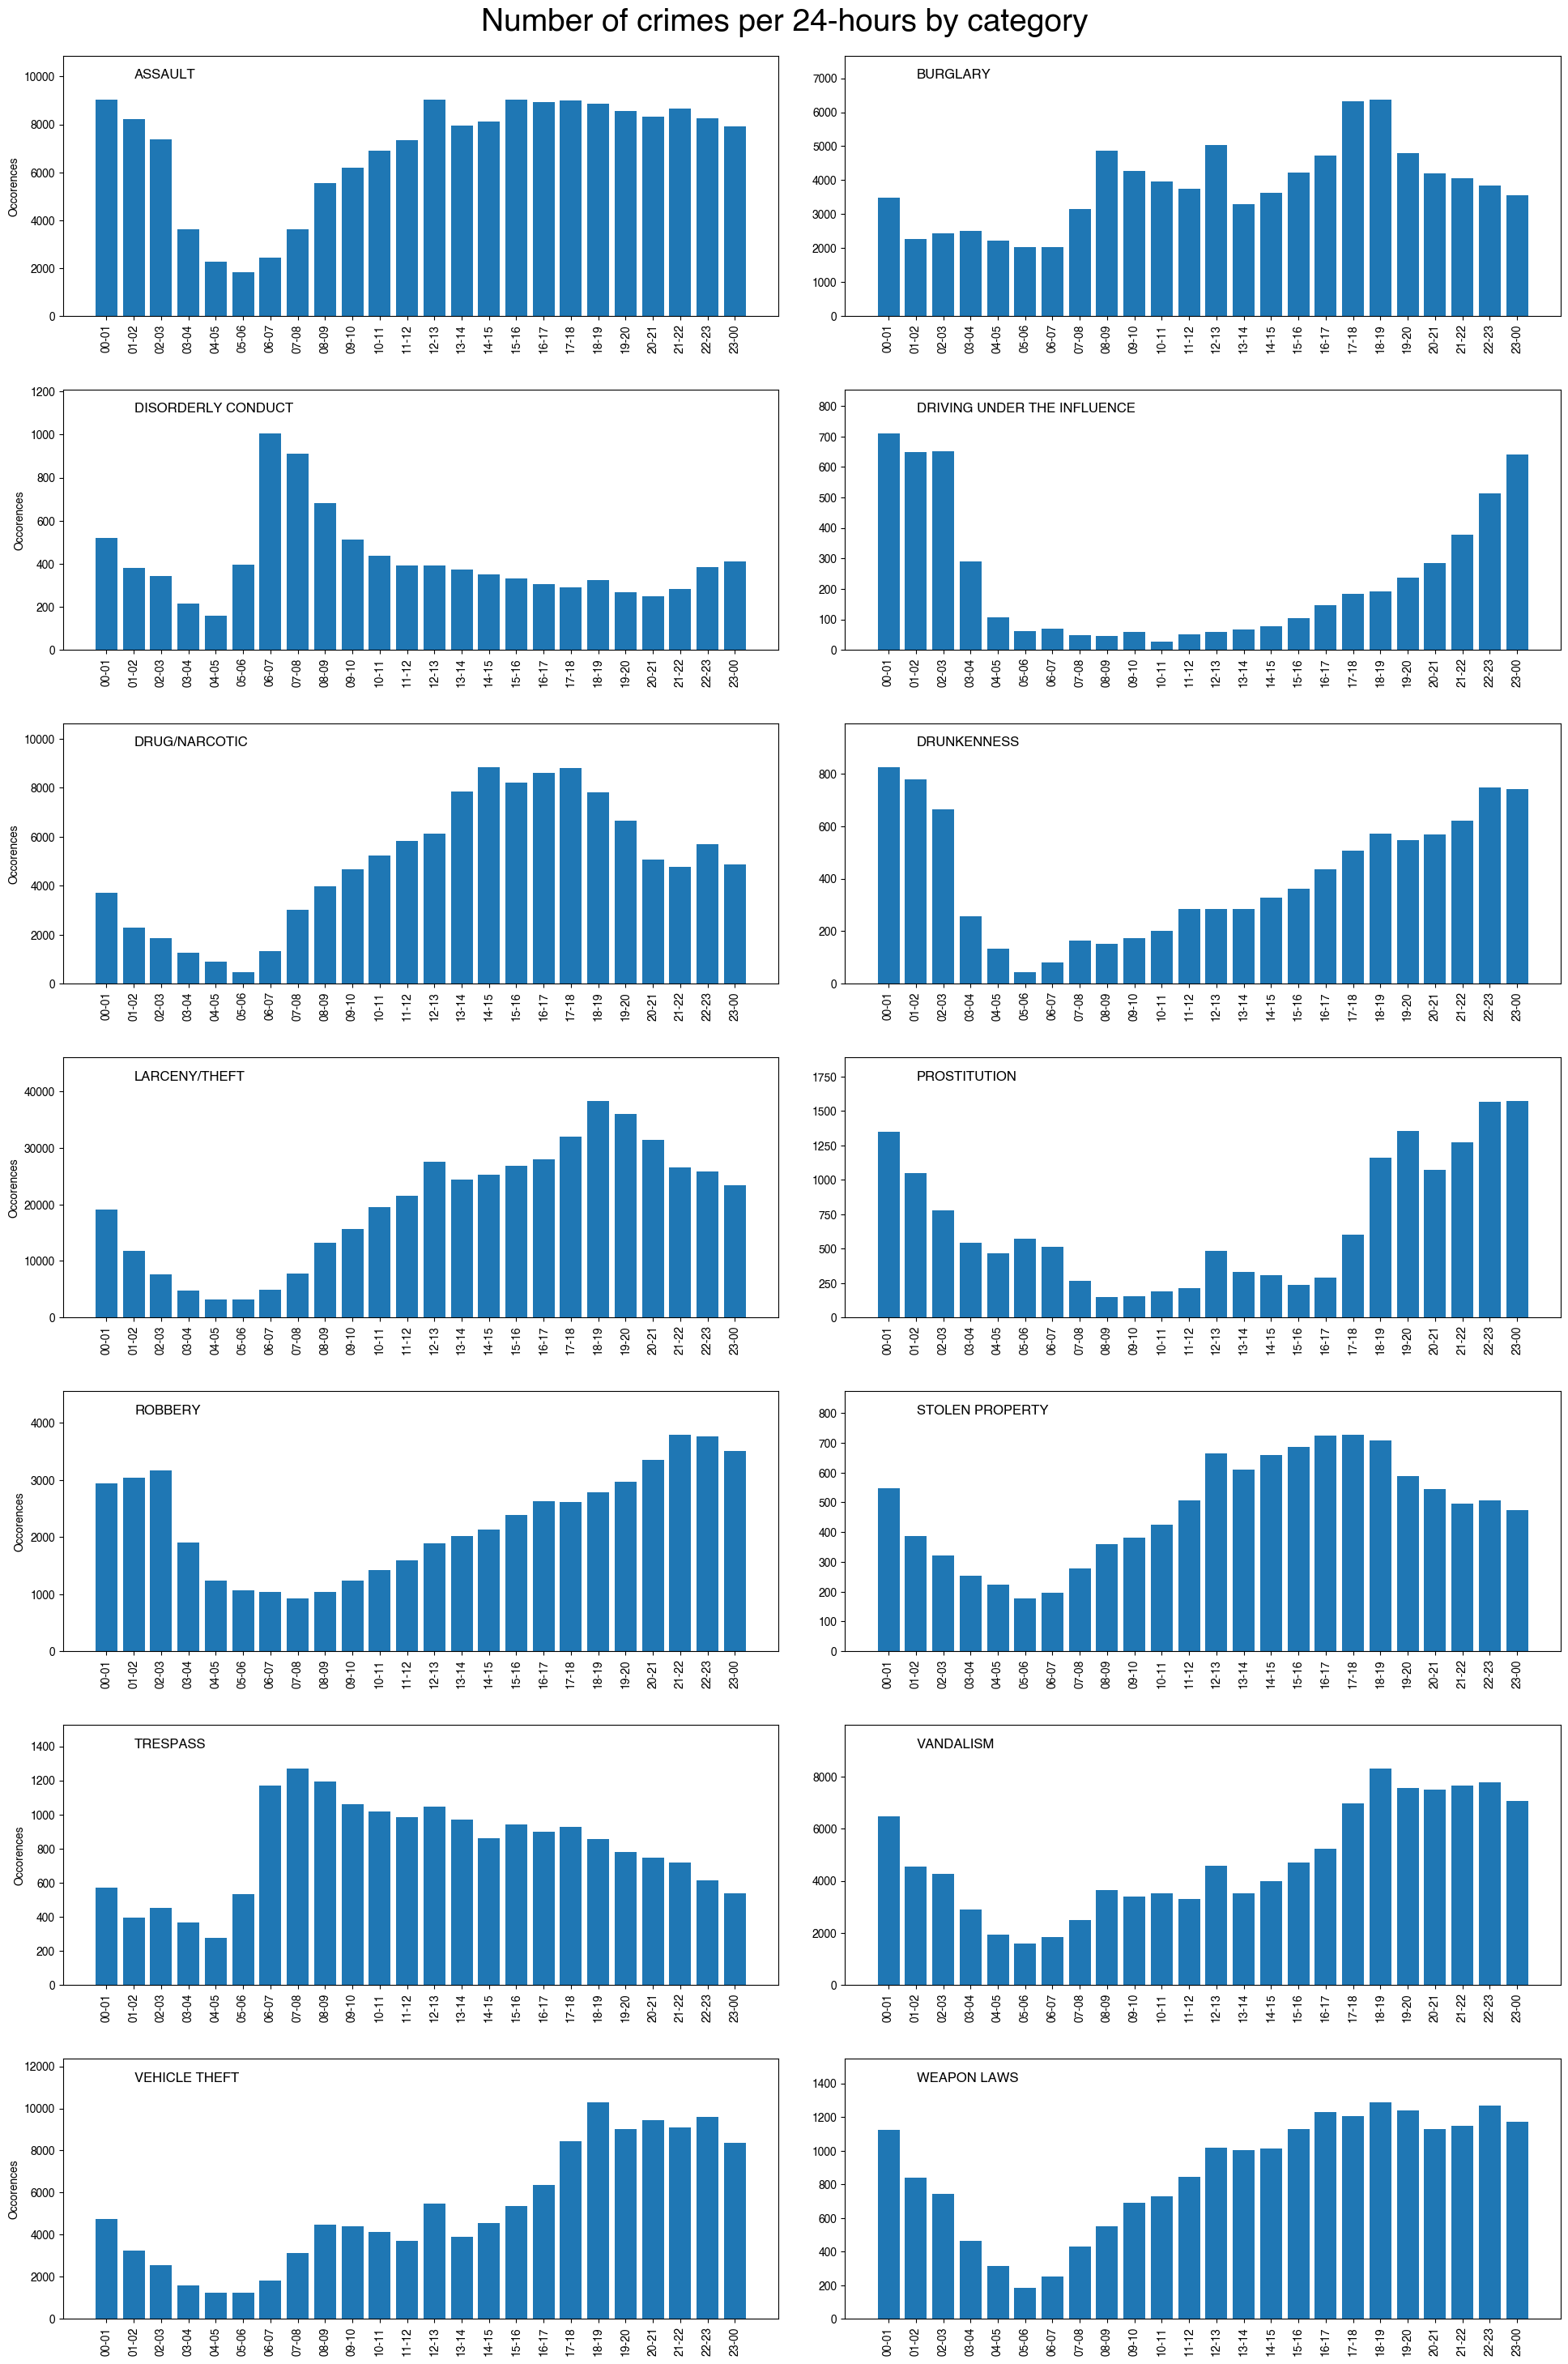

In [7]:
data['hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per 24-hours by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    #crime_counts_per_time = crime_data['time_numerical'].value_counts().sort_index() # count the crimes per year for this category
    
    crime_counts_per_hour = crime_data.groupby('hour').size()
    crime_counts_per_hour = crime_counts_per_hour.reindex(range(24), fill_value=0)
    


    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_hour.index, crime_counts_per_hour.values) # add data to the chart (x,y)
    
    ax.set_xticks(range(24))  # Set ticks for each hour
    ax.set_xticklabels([f'{hour:02d}-{(hour+1)%24:02d}' for hour in range(24)], rotation=90)  # Format labels as 'HH-HH'

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.

> This bar chart displays the count of hourly crimes by category, compiled from data spanning from January 2003 to early May 2018.   
> It is important to note that in these 14 charts, the occurrence counts (Y-axis) are not identical.     
> These charts reveal that crime incidents generally tend to decrease to their lowest levels during the early morning hours. 

#### 168 hours of the week

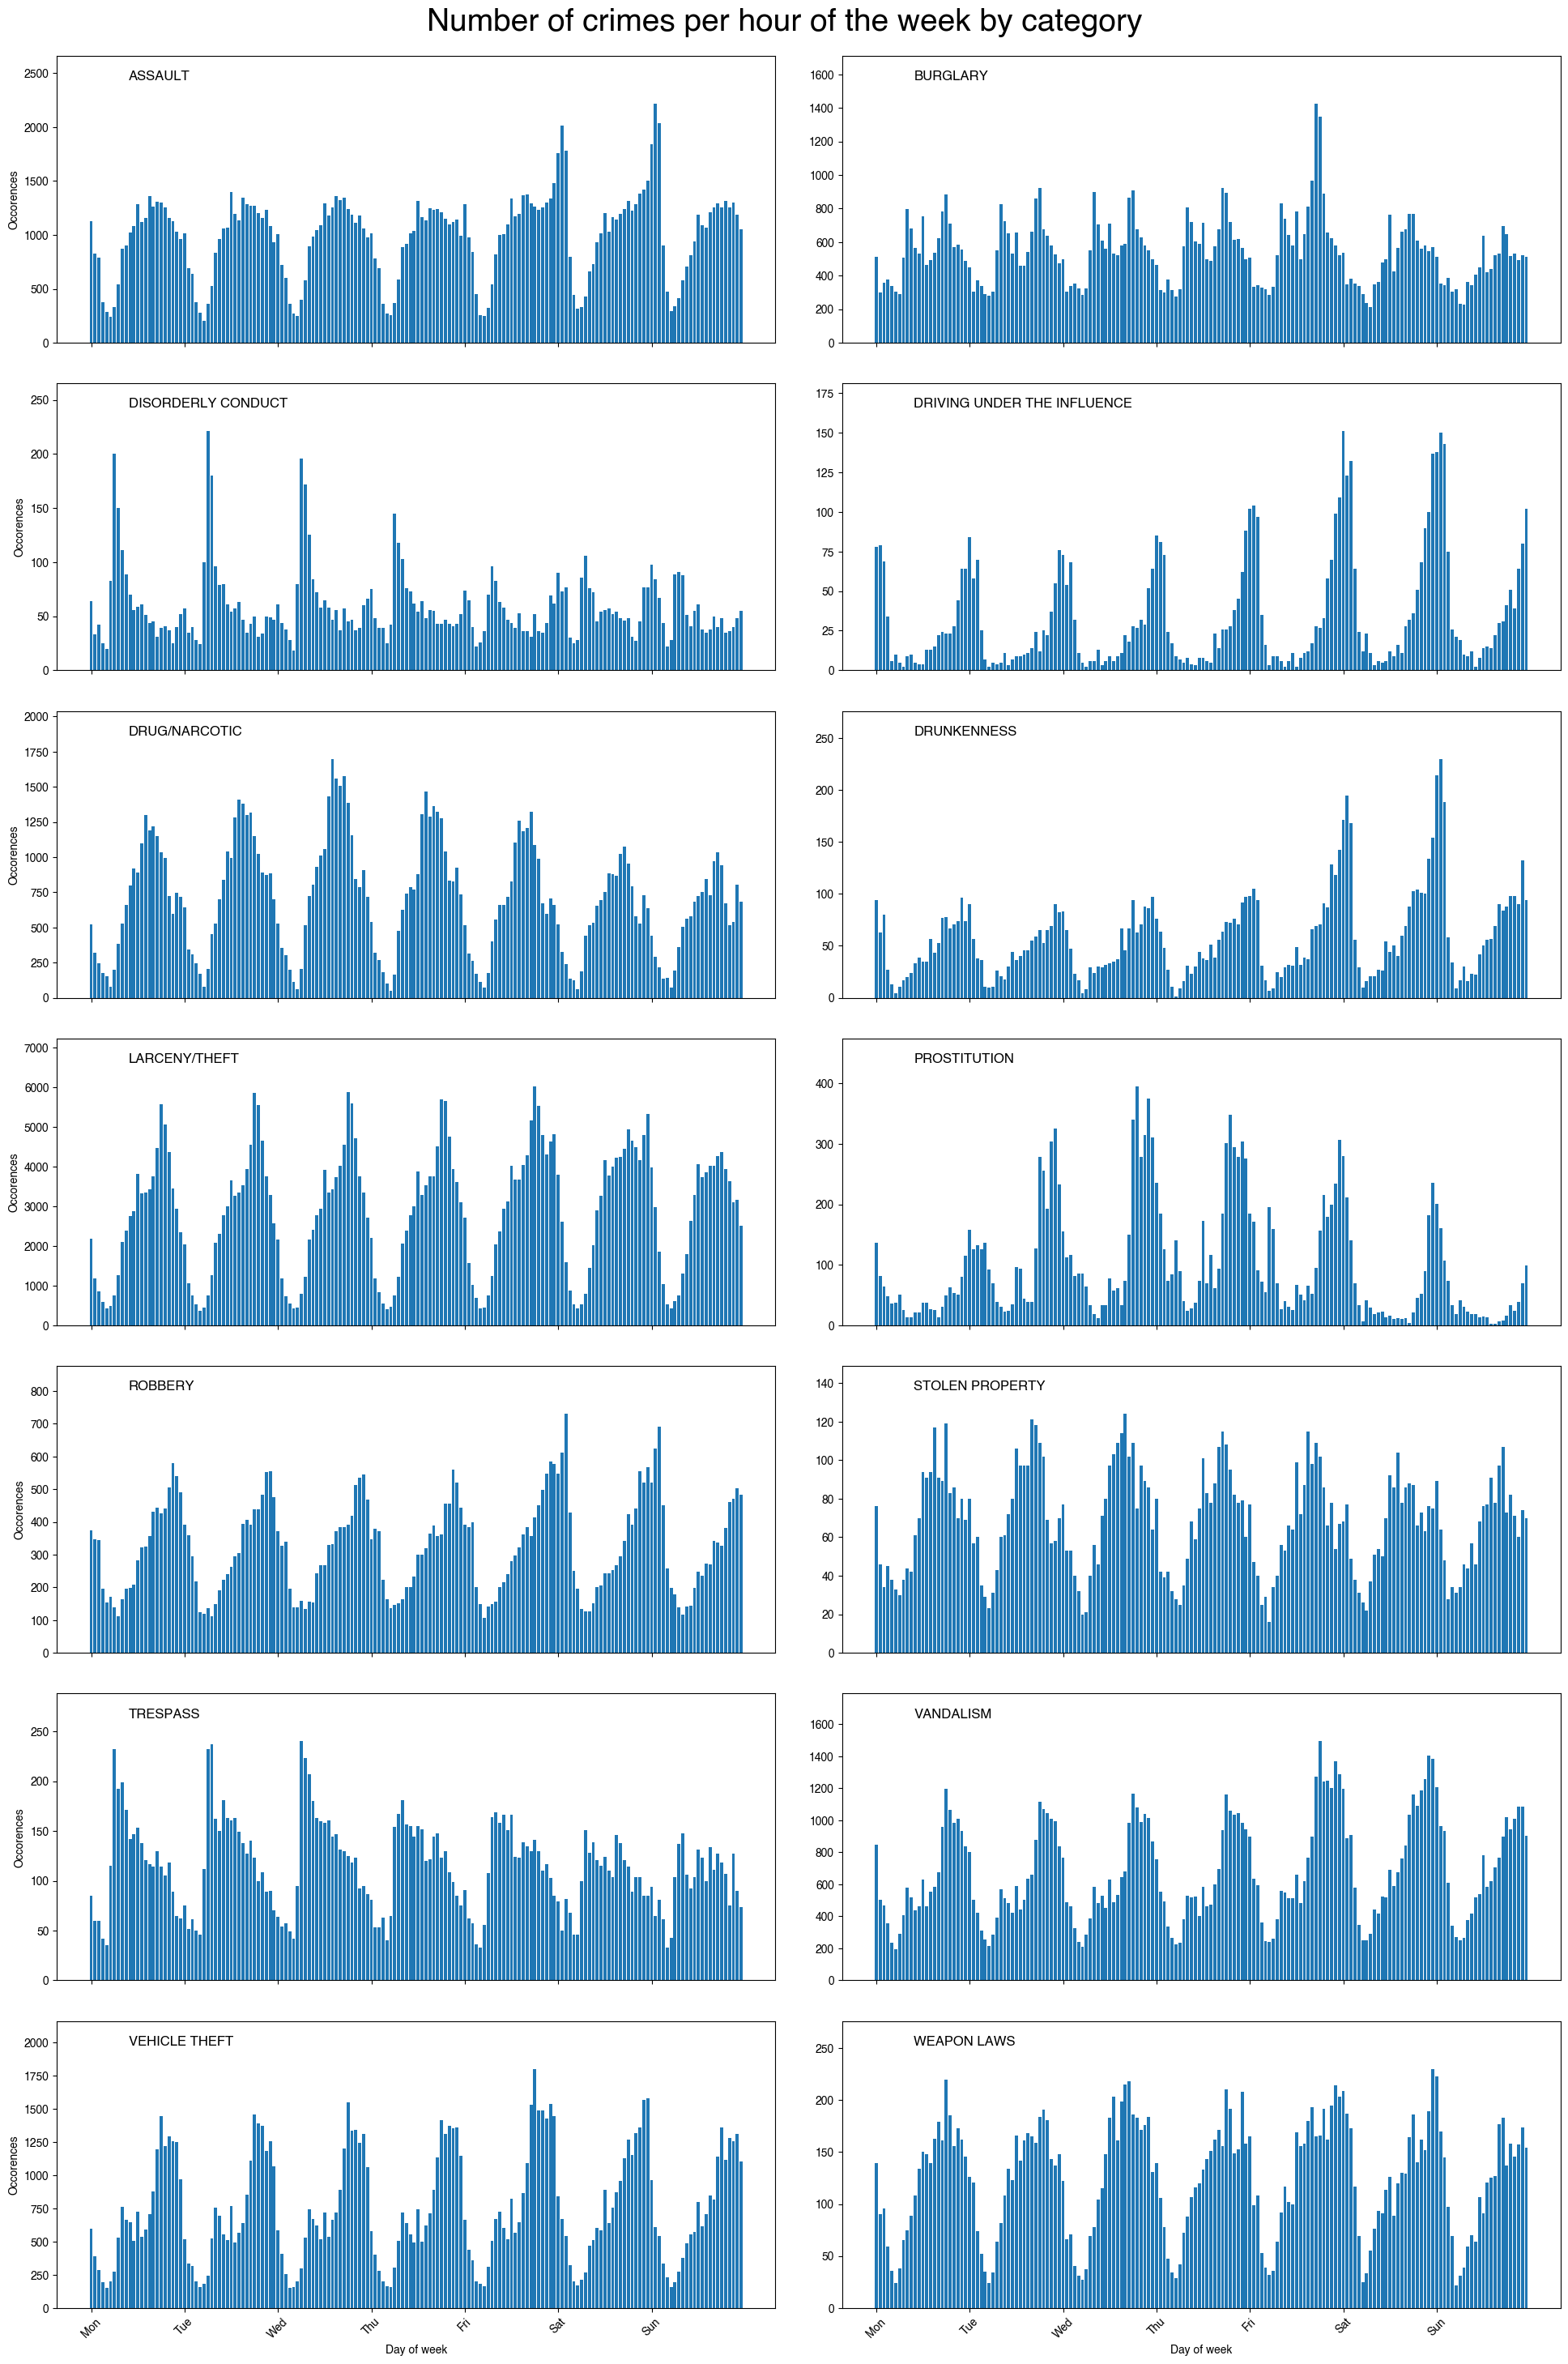

In [8]:
weekday_order = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

data['day_num'] = data['DayOfWeek'].map(weekday_order)
data['hour_of_week'] = data['day_num'] * 24 + data['hour']

fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per hour of the week by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    
    crime_counts_per_hour_of_week = crime_data.groupby('hour_of_week').size()
    crime_counts_per_hour_of_week = crime_counts_per_hour_of_week.reindex(range(168), fill_value=0)

    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_hour_of_week.index, crime_counts_per_hour_of_week.values) # add data to the chart (x,y)
    
    ax.set_xticks(range(0, 168, 24))  # Set ticks for the start of each day
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)  # Days of the week

    # add / remove years and years-title on all or the last 2
    ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Day of week')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.

> This bar chart presents the number of crimes per hour over the course of a week, categorized and aggregated from data collected from January 2003 to early May 2018.  
> It is important to note that in these 14 charts, the occurrence counts (Y-axis) are not identical.   
> A general trend observed in these charts is that all crimes have peak hours as well as low periods. Additionally, it appears that most crimes predominantly occur at night.

### Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

In [9]:
# Load the dataset into a DataFrame
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

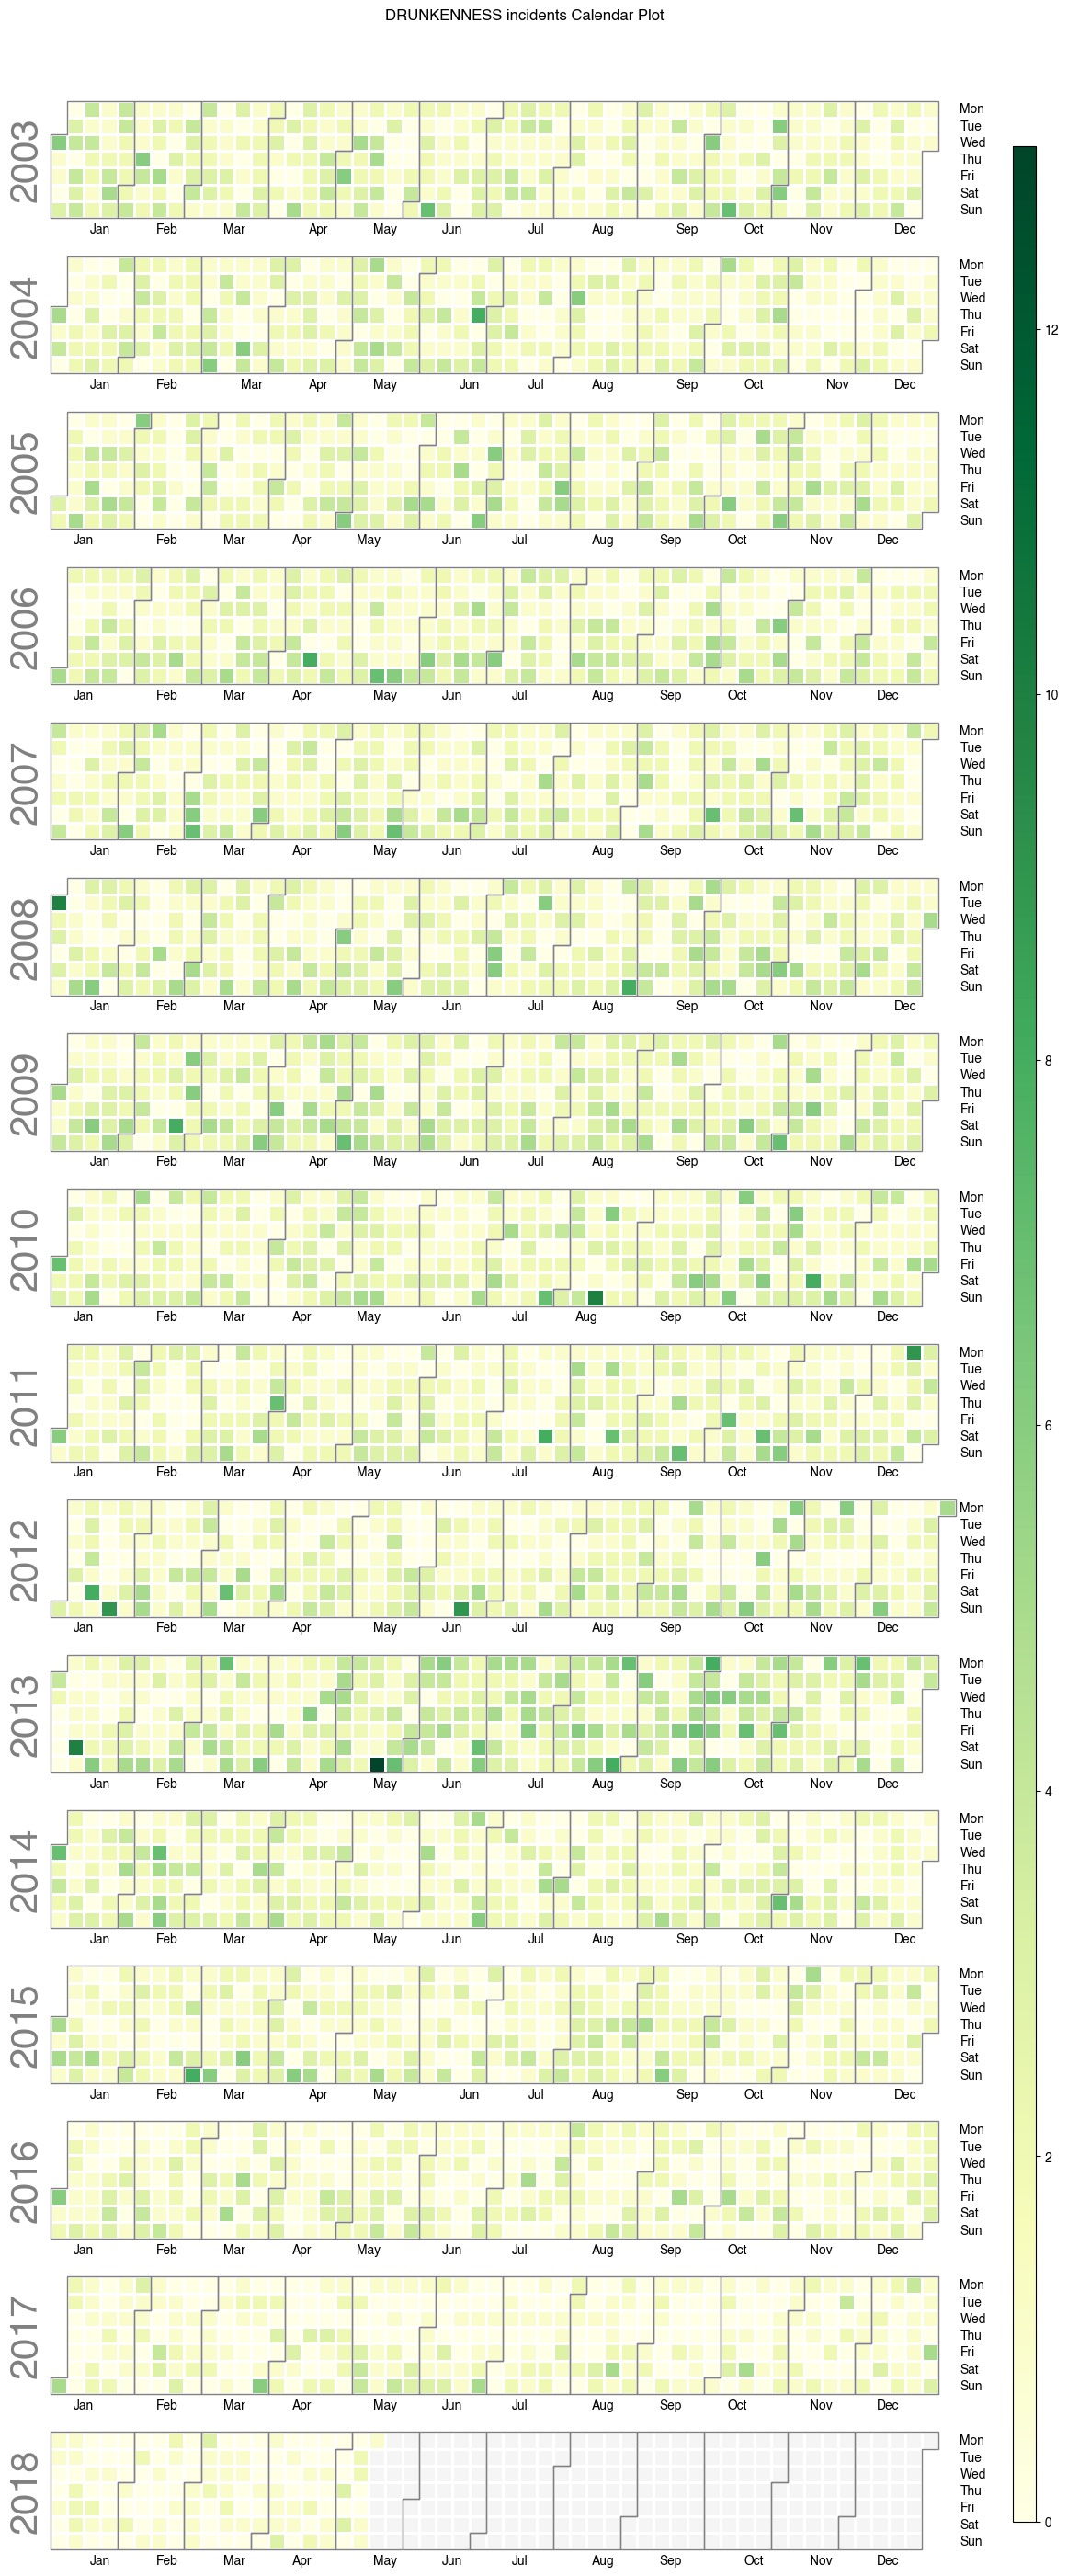

In [10]:
# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

crime_type = 'DRUNKENNESS'

# filter on a single crime type
assult_data = data[data['Category'] == crime_type]

# Create a Series with the count of incidents per day
incident_counts = assult_data['Date'].value_counts().sort_index()

# Plot the calendar map
calplot.calplot(incident_counts, cmap='YlGn', suptitle=f'{crime_type} incidents Calendar Plot')

# Show the plot
plt.show()

> The calendar plot above displays incidents of drunkenness recorded from early 2003 to the beginning of May 2018.    
> It ranges from 0 to 13 incidents, visualized as a gradient from transparent to dark green.    
> One can observe that the green color appears to lighten progressively from 2013 onwards. This could suggest a decline in this type of crime in recent years.    
> Additionally, the year 2013 features the darkest shade overall, indicating that the highest number of crimes in this category likely occurred in that year.

### Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

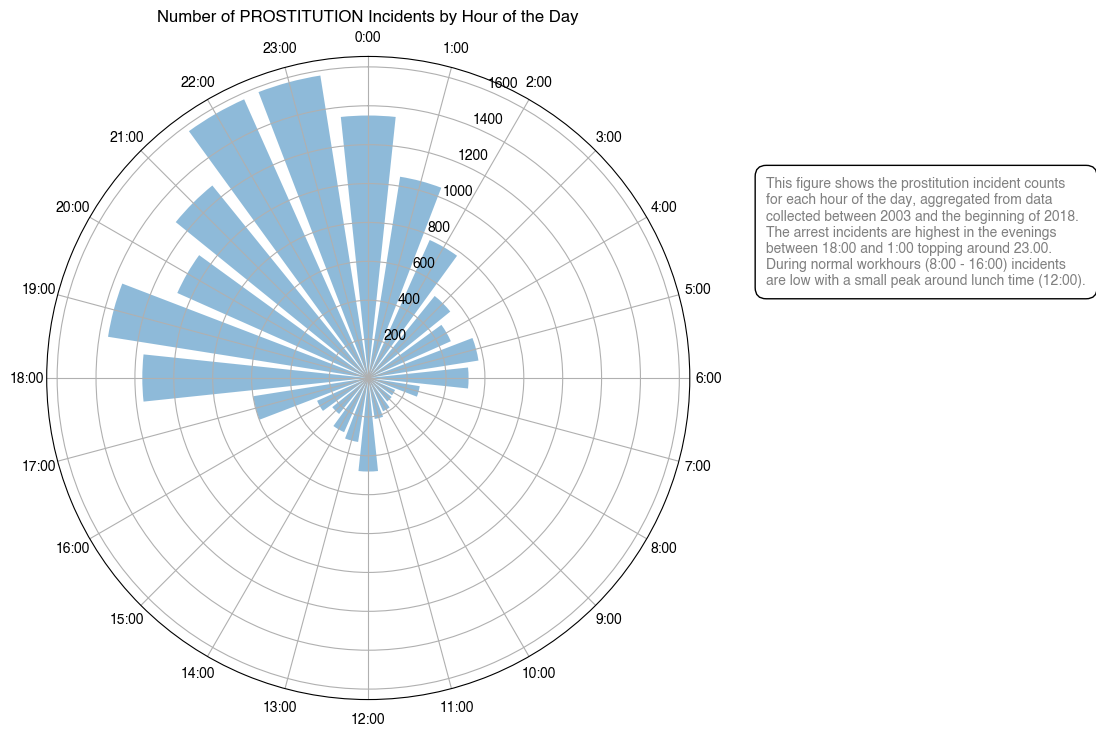

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

crime_type = 'PROSTITUTION'

# Filter on a single crime type
crime_data = data[data['Category'] == crime_type]

# Count the number of incidents for each hour of the day
hour_counts = crime_data['Hour'].value_counts().sort_index()

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Compute the angle for each bar, using 24 hours
theta = np.linspace(0.0, 2 * np.pi, len(hour_counts), endpoint=False)

# Adjust the width to create space between the bars.
bar_width = (2 * np.pi / 24) * 0.8 # Adjust the 0.8 to increase/decrease space

# Create the bars with adjusted width
bars = ax.bar(theta, hour_counts, width=bar_width, align='center', alpha=0.5)

# Set the labels for each bar (hours of the day)
ax.set_xticks(theta)
ax.set_xticklabels([f'{i}:00' for i in hour_counts.index]) # List comprehension to generate hour labels

# Set the direction and starting point of the hour labels in clockwise order, starting from the top.
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

# Set the title
ax.set_title(f'Number of {crime_type} Incidents by Hour of the Day')

figure_text = f'''This figure shows the {crime_type.lower()} incident counts 
for each hour of the day, aggregated from data 
collected between 2003 and the beginning of 2018.
The arrest incidents are highest in the evenings 
between 18:00 and 1:00 topping around 23.00.
During normal workhours (8:00 - 16:00) incidents 
are low with a small peak around lunch time (12:00).'''

plt.figtext(1.0, 0.6, figure_text, ha='left', va='bottom', fontsize=10, color='gray',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8'))
plt.tight_layout(pad=3)
plt.show()



### Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments.

> I am relatively accustomed to using pure Python for programming, and I've also used notebooks for this purpose. However, I had not used libraries like NumPy, pandas, or Matplotlib e.g before this course. This meant that I needed to study these libraries a bit before I could use them effectively. For this i used ChatGpt. Generally, my approach to understanding how to create the bar charts we worked with in week 1 involved asking questions like, "How can I add a title to my bar chart, and please explain how it works?"
>  
> The bar charts from week 2 were then built based on the knowledge I had gained.
>  
> For the calendar and the polar plots i have used ChatGpt to the full. I would copy and paste the question and use its suggestions as my starting point. In both cases, I needed to have a figure text displayed with the plot, so an additional question was, "Please apply a figure text to this plot." This isn't so different from knowing the Python syntax for doing this and adding it to the code. It could be seen as coding with a higher-level language (English) rather than Python. In the polar chart, I also wanted to have the hour labels shown in clockwise order and starting at the top. I asked about this as well. So, I think my use of ChatGPT in this case has been as a programming interface, not so different than if I knew the Python syntax. The coding language just happened to be a natural language (English).    
> When using a LLM it also becomes relativly easy if you have the question. The harder part in this workflow is to formulate the actual question or maybe even the usecase. 
>   
> I wrote the explanations for the plots myself and asked ChatGPT to proofread my texts.

## A1 Part 2: Dataviz questions 

**Question: What is the difference between data and metadata? How does that relate to the GPS tracks-example?**    
> Data refers to the primary information collected, representing the main subject of interest. Metadata, by contrast, is data about data, providing essential context and descriptions that help to understand and use the data more effectively.
>  
> In the context of the GPS tracks example, the data is specified in the \<trkpt\> section of the XML file. It includes latitude, longitude, and timestamp information. The metadata is primarily contained within the \<metadata\> section of the XML file. This includes information such as a <link> tag to the Garmin Connect platform, and a \<time\> tag probably specifying an update time or the like of the device used to track the data.


Q: **Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.**    
> When we talk about data analysis, the eye is an excellent tool for recognizing patterns such as detecting outliers, trends, and correlations in visual data. Our eyes are biologically designed for this pattern recognition, and we can utilize this ability to perform ultra-fast pattern recognition tasks, such as comparing the sizes of two boxes or the height of bars in a bar chart.  
  
Q: **Mention something that the human eye is very good at.**      
> If we have a large dataset, count related data and put it into visual boxes it becomes an easy task for the eye to detect wich one is largest or which one is double size of the other and so on.

Q: **Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.**    
> When what we look at becomes detailed it is gennerally more difficult for the eye to grasp. The concept can be described as [visual crowding](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3070834/). So, highly detailed charts with numerous data points, overlapping lines, and minimal contrast. Elements that are too small, too similar in color, or too densely arranged is complicated for the eye to grasp.

**Q: Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**    
> This examples is based on the "Kidney stone treatment" example from this [wikipage](https://en.wikipedia.org/wiki/Simpson%27s_paradox)   
>  
> Consider a study comparing two coaching methods (LLM and Traditional) for improving student test scores in the course "Social data analysis and visualization".     
> Method LLM showed better improvement for both beginner and advanced students:
>    
> * Biginner students: Method LLM (80% improvement, 50 students) vs. Method Trad. (70% improvement, 100 students)    
> * Advanced students: Method LLM (90% improvement, 25 students) vs. Method Trad. (85% improvement, 200 students)    
>   
> Overall, Method Trad. seemed more effective with an 80% improvement across 300 students, compared to Method LLM's 85% improvement in 75 students. This paradox occurs because Method Trad. was more frequently used with the larger group of advanced students, who were easier to teach, distorting the overall success rate. The imbalance in group sizes and student abilities reveals why Method Trad. appears superior when, in fact, Method LLM performs better for both groups individually.

Q: **In your own words, explain the differnece between exploratory and explanatory data analysis.**    
>  **Exploratory Data Analysis**    
> The purpose of Exploratory Data Analysis is to gain a broad overview of the domain. A simple example of this could be using the ```head()``` function on a DataFrame, ```df.head()```, to get an overview of the columns and data in the dataset.        
>
> **Explanatory Data Analysis**    
> This process is about explaining the data or delivering a message based on your interpretation of what the data is indicating. Taking our 'SF crime dataset' as an example, we exemplify this when we analyze the 'Number of crimes per weekday by category' and plotted it out in 14 bar charts. 

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

In [12]:
# Load a fresh copy of the dataset into a DataFrame
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

# Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
filtered_df = data[(data['Category'] == 'VEHICLE THEFT') & (data['DayOfWeek'] == 'Sunday')]

# Aggregate data by police district.
agg_val = filtered_df.groupby('PdDistrict').size().reset_index(name='IncidentCount')

response = requests.get('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson')
counties = response.json()
                   
# Create the figure
fig = px.choropleth_mapbox(agg_val, geojson=counties, locations='PdDistrict', color='IncidentCount',
                           color_continuous_scale="Viridis",
                           range_color=(agg_val['IncidentCount'].min(), agg_val['IncidentCount'].max()),
                           mapbox_style="carto-positron",
                           zoom=10.7, center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.7
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

When you're done, reflect on the following questions.

**Q: Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?**    
> If you only focus on the map and its colors, Tenderloin appears to be the safest place with a total of 356 incidents, while Ingleside seems to be the worst, with a total of 2846 incidents. However, the area of Tenderloin is likely less than 1/20th the size of Ingleside, making such a comparison challenging in reality. A more fine-grained map (at street level) would probably show a more accurate results for this analysis. 

**Q: Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors): - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?**    
   
> The <small>range_color</small> parameter <small>choropleth_mapbox</small> function has a minimun and a maximum parameter. If you set the max value to 2000, then every district with a higher crime insident value, like Ingleside, will "max out" and become yellow. This will remove the nuances between the districts and efficiently making most of them look simular (have simular crime rates). 


**Q: Why do you think perceptual errors are a problem? Try to think of a few examples.**    
> The reason why perceptual errors are problematic is that they can lead to the misinterpretation of data. One example is the use of light and strong colors. The stronger colors will naturally appear more significant than, for instance, light grey.    
> Another example is the 'Fox News Obamacare' graph, where initially the lack of scale on the graph made the comparison between bars misleading (see ["We Fixed Fox News' Embarrassing Obamacare Chart"](https://www.businessinsider.com/fox-news-obamacare-chart-2014-3?r=US&IR=T)).     
> Although data visualization in some sense aims to simplify data, oversimplification can also be misleading. For example, the strong color on Tenderloin makes it seem important, but it doesn't reveal whether a similarly sized area in another district would have comparable crime rates. Thus, focusing solely on 'District' could be seen as an oversimplification of data if you want to know where to park your car on Sundays.

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become hard (or impossible) to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, in a more general sense, we learn that when we visualize, data errors become difficult to identify when binning the data. We explore this process in the exercise below.

**Q: In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data.**    
> 1. Spike on Thursdays for prostitution    
> The data-errors causing the spike on Thursday connected with the prostitution crime, can cause that thursdays overall will look like having more arrests regarding prostetution than is the actual case. 
> 
> 2. Timestamps in Crime Recording     
> Summing up crimes by time without considering this recording bias could falsely suggest that crimes occur more frequently at full or half hours. 
> 
> 3. Sex offences Hotspot around Hall of Justice    
> If we group crime data by area without carefully inspecting the locations, these irregularities could shift our understanding of where crime is most frequent, leading us to incorrect conclusions about the actual problem spots.
>  
**Q: Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).**    
>  In all three cases, the issue might be that not spotting these irregularities could lead to a wrong understanding or modeling of San Francisco's societal patterns, possibly resulting in the allocation of resources or the making of policies based on falls data. 

**Q: Find your own example of human noise in the data and visualize it.**    
>   A simple way to detect anomalities in the dataset is to create a scatter plot where the lattitude and longtitude of where the unique crime toke place are plotted in on the x and y axis. 

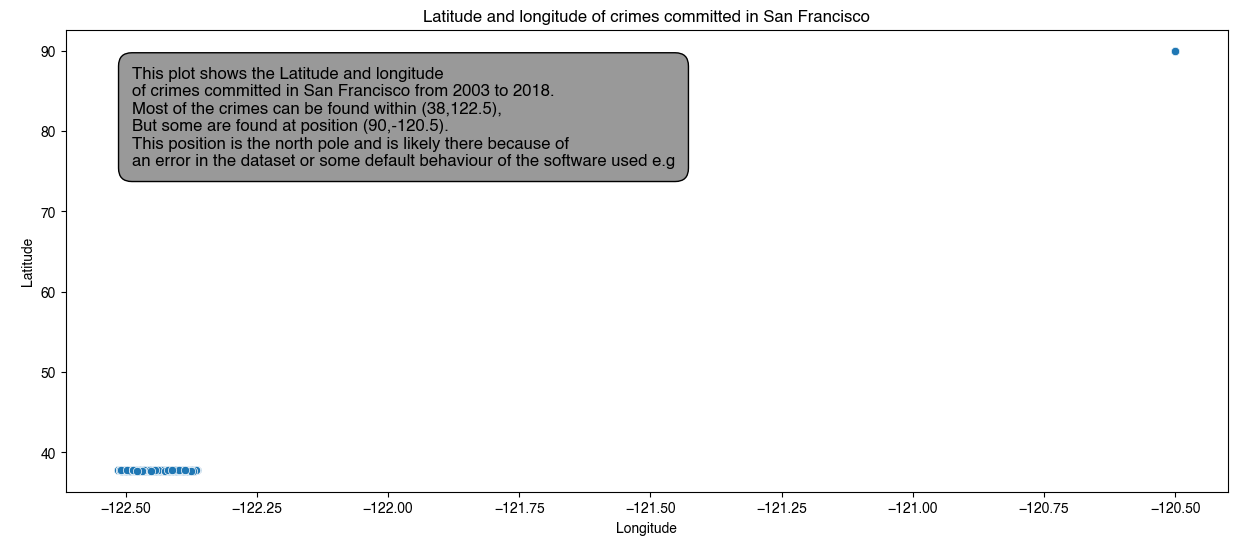

In [13]:
import seaborn as sns
# Load a fresh copy of the dataset into a DataFrame
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

plt.figure(figsize=(15, 6))
plt.title('Latitude and longitude of crimes committed in San Francisco')
sns.scatterplot(x='X', y='Y', data=data)

fig_text = f'''This plot shows the Latitude and longitude 
of crimes committed in San Francisco from 2003 to 2018. 
Most of the crimes can be found within (38,122.5), 
But some are found at position (90,-120.5). 
This position is the north pole and is likely there because of
an error in the dataset or some default behaviour of the software used e.g'''

plt.text(0.08, 0.48, fig_text, ha='left', va='bottom', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='#999999', edgecolor='black', boxstyle='round,pad=0.8')) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


> In this plot we see that almost all crimes are places within the districts of San Fransico, ecxept for one (or more) that has the X = -120.5 and Y 90, which is not a valid (lon,lat) position (North pole). This seams like a human noise mistake in the dataset and should not be taken into account.   
>      
> In order to detarmain if this is a single entry at (-120.5, 90) or many entries we could create a jitterplot making it easier to see if this is the case.

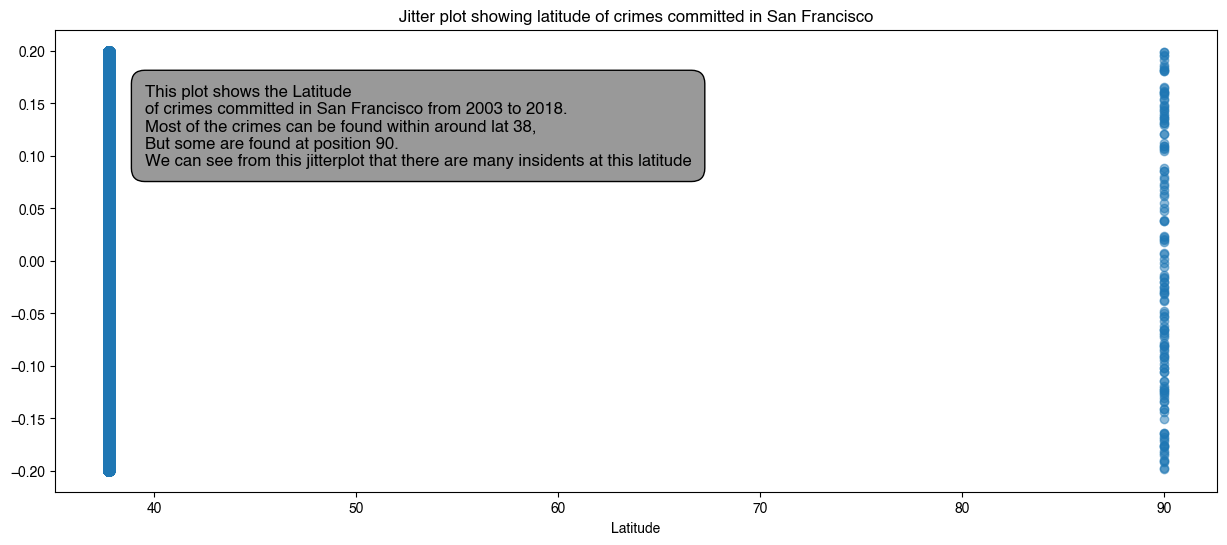

In [14]:
plt.figure(figsize=(15, 6))
plt.title('lat and lon of crimes in San Fransico')
jitter = np.random.uniform(-0.2, 0.2, size=len(data))
plt.scatter(data['Y'], jitter, alpha=0.5)
plt.title('Jitter plot showing latitude of crimes committed in San Francisco')

fig_text = '''This plot shows the Latitude 
of crimes committed in San Francisco from 2003 to 2018. 
Most of the crimes can be found within around lat 38, 
But some are found at position 90. 
We can see from this jitterplot that there are many insidents at this latitude'''

plt.text(0.1, 0.48, fig_text, ha='left', va='bottom', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='#999999', edgecolor='black', boxstyle='round,pad=0.8')) 
plt.xlabel('Latitude')
plt.show()

> The jitterplot shows us that there are many insidents at the latitude 90.     
> To investigate it further we could filter the dataset for entries with these X values.

In [15]:
filtered_df = data[(data['Y'] >= 89) & (data['Y'] <= 90)]
filtered_df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5134166327195,51341663,27195,TRESPASS,TRESPASSING,Monday,11/28/2005,16:04,TENDERLOIN,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4371,5096788664020,50967886,64020,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,08/28/2005,16:00,TENDERLOIN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> The reasons for these incidents can be numerous and difficult to speculate on, but they should be removed from the dataset to avoid contaminating the valid data entries. 

**Q: Did you find LLMs useful for anything in this exercise? Explain why/why not.** 
> Initially it helped me with understanding the 3 examples better. What was the observation, bias in the binned data, and what was the risk of misconception. It also helped me to create a step by step method for looking for human noise in the dataset. So in general it helped me to structure the tasks.

## Contributions

I have not been in a group for this first assignment and have therefore done all work on my own. 